# Phase 3 Project

## Business Understanding

I have been commissioned by the Customer Retention Manager at SyriaTel to develop a binary classification model aimed at predicting customer churn. This model is essential for identifying customers at high risk of leaving the company, allowing SyriaTel to proactively address potential attrition. By analyzing the key factors contributing to churn, the Retention Manager can implement targeted strategies to enhance customer retention, thereby minimizing revenue loss and boosting long-term profitability. The insights generated from this model will be instrumental in shaping effective marketing campaigns and optimizing customer engagement efforts.



## Data Understanding

The dataset, sourced from [Kaggle](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset), contains 3,333 records related to SyriaTel customers, focusing on their service usage and interaction with the company. The primary goal is to use these features to predict customer churn, indicated by the `churn` column.


#### Feature Descriptions:
- `state`: The U.S. state where the customer resides (categorical).
- `account length`: Duration of the customer's account in days (integer).
- `area code`: Area code associated with the customer's phone number (integer).
- `phone number`: Customer's phone number (categorical, treated as an identifier).
- `international plan`: Indicates if the customer has an international calling plan (categorical: "yes" or "no").
- `voice mail plan`: Indicates if the customer has a voice mail plan (categorical: "yes" or "no").
- `number vmail messages`: Number of voice mail messages received by the customer (integer).
- `total day minutes`: Total minutes used by the customer during the day (float).
- `total day calls`: Total number of calls made by the customer during the day (integer).
- `total day charge`: Total charges for daytime calls (float).
- `total eve minutes`: Total minutes used by the customer in the evening (float).
- `total eve calls`: Total number of calls made by the customer in the evening (integer).
- `total eve charge`: Total charges for evening calls (float).
- `total night minutes`: Total minutes used by the customer at night (float).
- `total night calls`: Total number of calls made by the customer at night (integer).
- `total night charge`: Total charges for nighttime calls (float).
- `total intl minutes`: Total number of international minutes used by the customer (float).
- `total intl calls`: Total number of international calls made by the customer (integer).
- `total intl charge`: Total charges for international calls (float).
- `customer service calls`: Number of calls made by the customer to customer service (integer).
- `churn`: Boolean indicator of whether the customer has discontinued their service (target variable).


## Data exploration


In [149]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression,LinearRegression
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split,cross_val_score
pd.set_option('display.max_columns', None)

In [70]:
df = pd.read_csv('./Data/SyriaTel.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [72]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [73]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

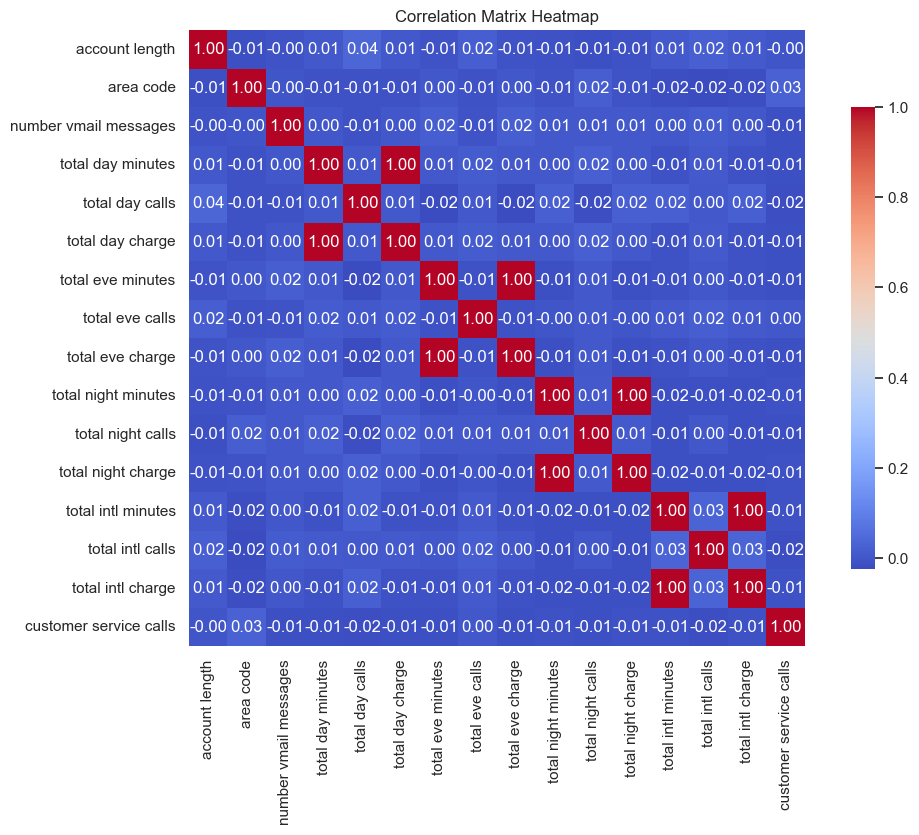

In [74]:
# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink': 0.75})
plt.title('Correlation Matrix Heatmap')
plt.show()

## Data Preprocessing

### Renaming columns

In [77]:
df.columns = df.columns.str.replace(' ', '_')

### Dropping irrelevant columns

Dropping `phone_number` column since it wont be needed in creating our model and we the drop the minutes columns since they provide exact same information as the charge columns as seen in the above heatmap

In [80]:
dropped_columns = ['phone_number', 'total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes']
df = df.drop(columns=dropped_columns)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   international_plan      3333 non-null   object 
 4   voice_mail_plan         3333 non-null   object 
 5   number_vmail_messages   3333 non-null   int64  
 6   total_day_calls         3333 non-null   int64  
 7   total_day_charge        3333 non-null   float64
 8   total_eve_calls         3333 non-null   int64  
 9   total_eve_charge        3333 non-null   float64
 10  total_night_calls       3333 non-null   int64  
 11  total_night_charge      3333 non-null   float64
 12  total_intl_calls        3333 non-null   int64  
 13  total_intl_charge       3333 non-null   float64
 14  customer_service_calls  3333 non-null   

### encoding object variables to integers

In [83]:
print('State',df['state'].value_counts())
print('')
print('international_plan',df['international_plan'].value_counts())
print('')
print('voice mail plan',df['voice_mail_plan'].value_counts())


State state
WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: count, dtype: int64

international_plan international_plan
no     3010
yes     323
Name: count, dtype: int64

voice mail plan voice_mail_plan
no     2411
yes     922
Name: count, dtype: int64


### LableEncoding

In [85]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()
df['international_plan'] = df['international_plan'].map({'yes': 1, 'no': 0})
df['voice_mail_plan'] = df['voice_mail_plan'].map({'yes': 1, 'no': 0})


### OneHotEncoding

In [87]:
df = pd.get_dummies(df, columns=['state'], prefix=['state'], dtype=int)


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 66 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   area_code               3333 non-null   int64  
 2   international_plan      3333 non-null   int64  
 3   voice_mail_plan         3333 non-null   int64  
 4   number_vmail_messages   3333 non-null   int64  
 5   total_day_calls         3333 non-null   int64  
 6   total_day_charge        3333 non-null   float64
 7   total_eve_calls         3333 non-null   int64  
 8   total_eve_charge        3333 non-null   float64
 9   total_night_calls       3333 non-null   int64  
 10  total_night_charge      3333 non-null   float64
 11  total_intl_calls        3333 non-null   int64  
 12  total_intl_charge       3333 non-null   float64
 13  customer_service_calls  3333 non-null   int64  
 14  churn                   3333 non-null   

### Scaling variables 

## EDA

''

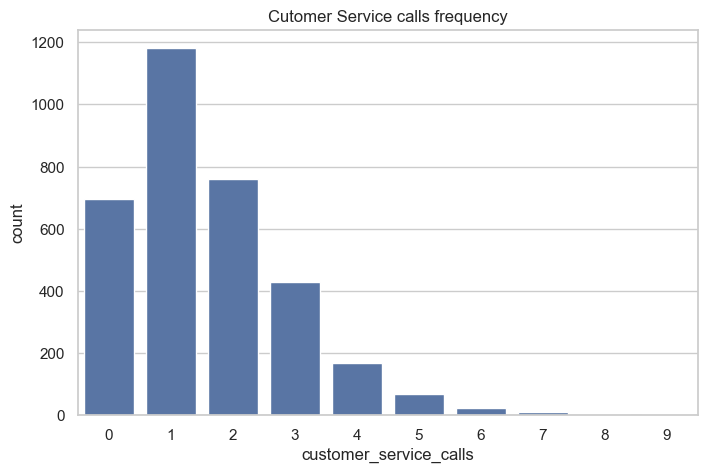

In [91]:
fig, ax = plt.subplots(figsize = (8,5))
sns.countplot(x='customer_service_calls', data=df, ax = ax)
ax.set_title("Cutomer Service calls frequency")
;


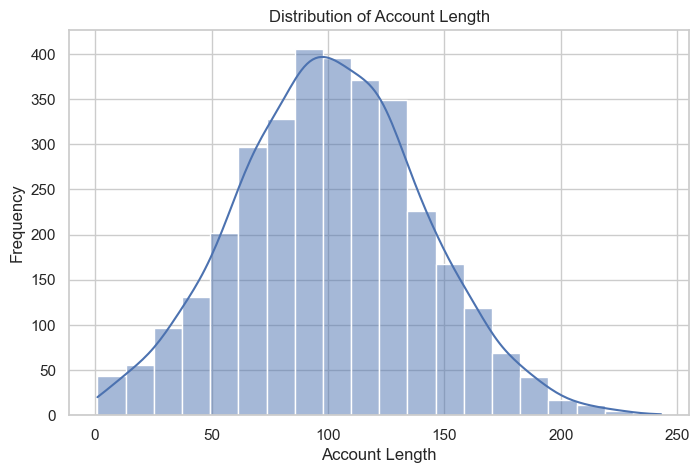

In [34]:
    # Plot 1: Distribution of account length
    plt.figure(figsize=(8, 5))
    sns.histplot(df['account_length'], bins=20, kde=True)
    plt.title("Distribution of Account Length")
    plt.xlabel("Account Length")
    plt.ylabel("Frequency")
    plt.show()

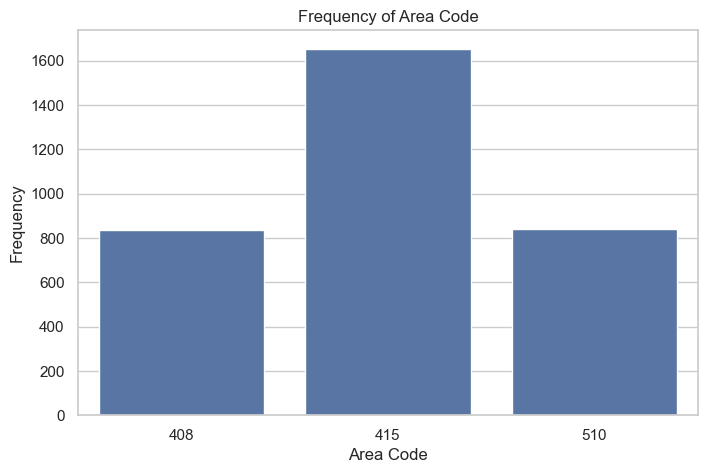

In [38]:
    # Plot 2: Distribution of area code
    plt.figure(figsize=(8, 5))
    sns.countplot(x='area_code', data=df)
    plt.title("Frequency of Area Code")
    plt.xlabel("Area Code")
    plt.ylabel("Frequency")
    plt.show()

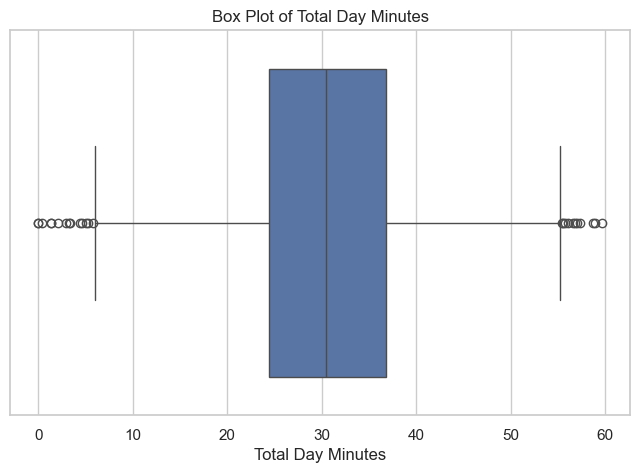

In [53]:
    # Plot 3: Box plot of total day minutes
plt.figure(figsize=(8, 5))
sns.boxplot(x='total_day_charge', data=df)
plt.title("Box Plot of Total Day Minutes")
plt.xlabel("Total Day Minutes")
plt.show()

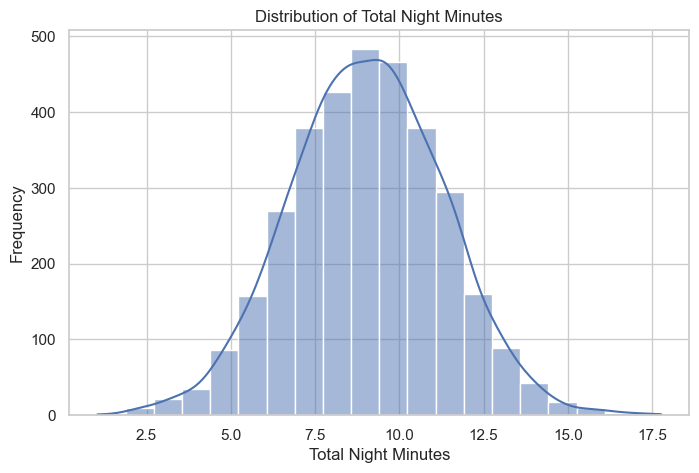

In [61]:
 # Plot 4: Distribution of total night minutes
plt.figure(figsize=(8, 5))
sns.histplot(df['total_night_charge'], bins=20, kde=True)
plt.title("Distribution of Total Night Minutes")
plt.xlabel("Total Night Minutes")
plt.ylabel("Frequency")
plt.show()

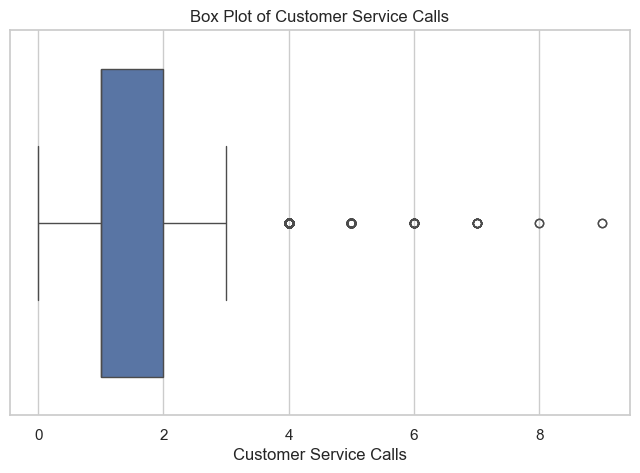

In [214]:
   # Plot 6: Box plot of customer service calls
plt.figure(figsize=(8, 5))
sns.boxplot(x='customer_service_calls', data=df)
plt.title("Box Plot of Customer Service Calls")
plt.xlabel("Customer Service Calls")
plt.show()

<Figure size 100x800 with 0 Axes>

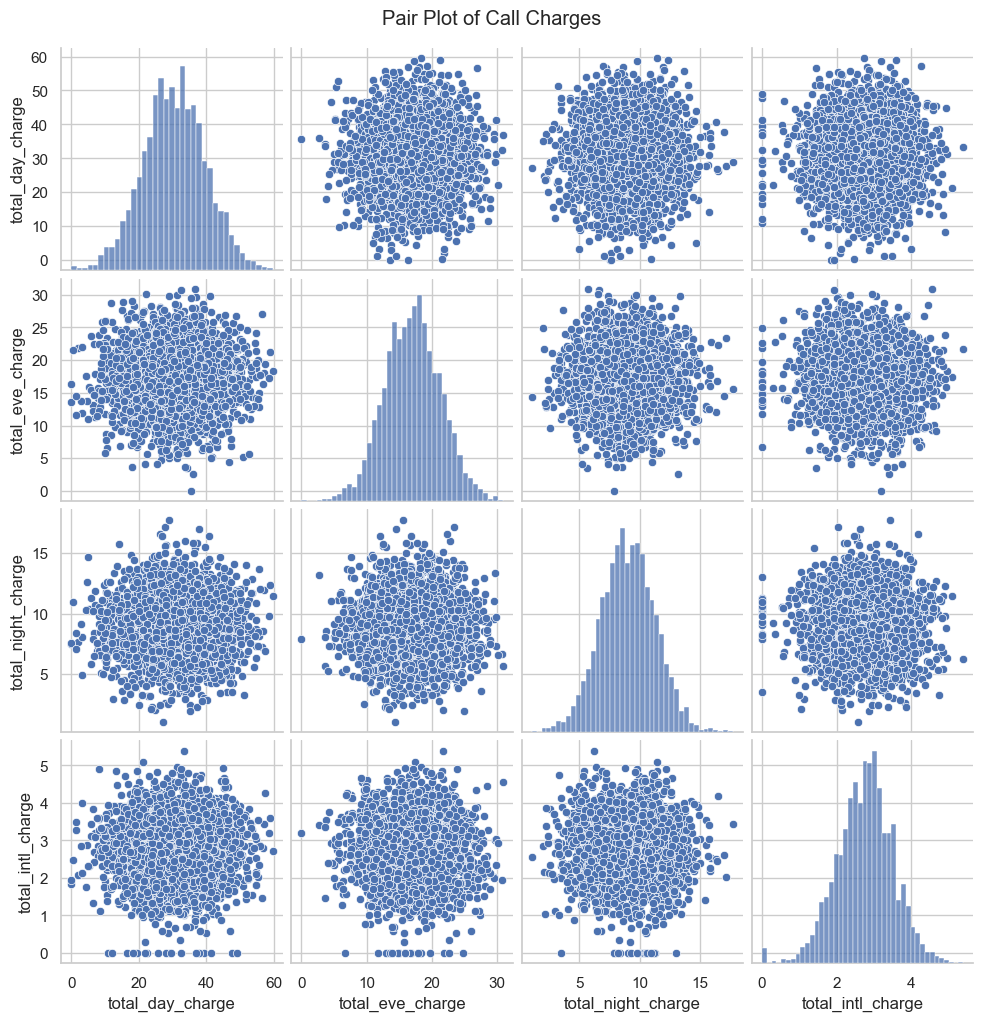

In [200]:

    # Plot 7: Pair plot of total day, eve, night, and intl minutes
plt.figure(figsize=(1, 5))
sns.pairplot(df[['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge']])
plt.suptitle("Pair Plot of Call Minutes", y=1.02)
plt.show();

## Modeling

### Declaring variables

In [71]:
X = df.drop(columns=['churn'], axis = 1)
y = df['churn']

### Splitting variables 

In [73]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size= 0.25, )

### Logestic regression

#### Baseline model

In [87]:
logreg = LogisticRegression(max_iter= 10000)
logreg

LogisticRegression(max_iter=10000)

In [91]:
logreg.fit(X_train, y_train)
# Predict on the test set
y_pred = logreg.predict(X_test)


Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.96      0.93       857
        True       0.57      0.31      0.41       143

    accuracy                           0.87      1000
   macro avg       0.73      0.64      0.67      1000
weighted avg       0.85      0.87      0.85      1000



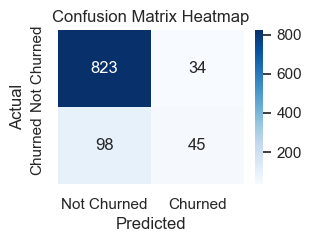

In [179]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Confusion matrix
plot_confusion_matrix(y_test, y_pred, labels=['Not Churned', 'Churned'])



**Accuracy**: 85%  
The logistic regression model achieved an accuracy of 85%, indicating it correctly predicted the outcome for 85% of the test cases.

**Classification Report**:  
- **False Class (Not Churned)**:
  - **Precision**: 87% – The model correctly identified 87% of non-churned instances.
  - **Recall**: 96% – It detected 96% of actual non-churned cases.
  - **F1-Score**: 91% – Shows strong performance in predicting non-churned customers.

- **True Class (Churned)**:
  - **Precision**: 48% – The model correctly identified 48% of churned instances.
  - **Recall**: 22% – It detected only 22% of actual churned cases.
  - **F1-Score**: 30% – Indicates lower performance in predicting churned customers.

The model performs well in predicting non-churned customers but struggles with churned cases. This issue is likely due to class imbalance, as there are significantly fewer churned customers compared to non-churned ones. The imbalance causes the model to be biased towards predicting the majority class (non-churned), leading to lower recall and precision for the minority class (churned).



### iteration #1

Fixing the class imbalance issue

In [125]:
#fixing class imbalance 
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

# Fit and transform the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [185]:
# Train the Logistic Regression model on the resampled data
logreg = LogisticRegression(class_weight='balanced',max_iter=10000)
logreg.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_resample = logreg.predict(X_test)

Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.96      0.93       857
        True       0.57      0.31      0.41       143

    accuracy                           0.87      1000
   macro avg       0.73      0.64      0.67      1000
weighted avg       0.85      0.87      0.85      1000

Confusion Matrix:


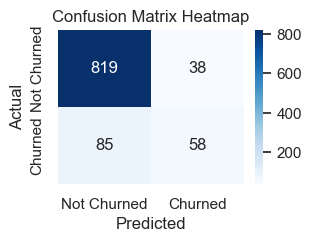

In [186]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
plot_confusion_matrix(y_test, y_pred_resample, labels=['Not Churned', 'Churned'])


### Model Evaluation Summary

**Accuracy**: 84%  
After applying SMOTE to address class imbalance, the logistic regression model achieved an accuracy of 84%, indicating it correctly predicted the outcome for 84% of the test cases.

**Classification Report**:  
- **False Class (Not Churned)**:
  - **Precision**: 89% – The model correctly identified 89% of non-churned instances.
  - **Recall**: 94% – It detected 94% of actual non-churned cases.
  - **F1-Score**: 91% – Indicates strong performance in predicting non-churned customers.

- **True Class (Churned)**:
  - **Precision**: 47% – The model correctly identified 47% of churned instances.
  - **Recall**: 32% – It detected 32% of actual churned cases.
  - **F1-Score**: 38% – Shows improved but still lower performance in predicting churned customers compared to before.



### iteration #2

Combining other diffrence sampling startagies to further imporve class imbalance 

In [151]:
under_sampler = RandomUnderSampler(random_state=42)

# Combine oversampling and undersampling
pipeline = Pipeline([
    ('over', smote),
    ('under', under_sampler),
    ('model', LogisticRegression(class_weight='balanced', max_iter=10000))
])

Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.96      0.93       857
        True       0.57      0.31      0.41       143

    accuracy                           0.87      1000
   macro avg       0.73      0.64      0.67      1000
weighted avg       0.85      0.87      0.85      1000



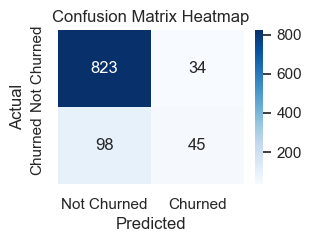

In [247]:
pipeline.fit(X_train, y_train)

y_pred_resample_mix = pipeline.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_resample_mix):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_resample_mix))
plot_confusion_matrix(y_test, y_pred_resample_mix, labels=['Not Churned', 'Churned'])



### Iterarion #3

Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.96      0.93       857
        True       0.57      0.29      0.39       143

    accuracy                           0.87      1000
   macro avg       0.73      0.63      0.66      1000
weighted avg       0.84      0.87      0.85      1000



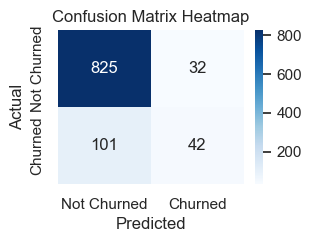

In [249]:
pipeline_scaled = Pipeline([
    ('over', smote),
    ('under', under_sampler),
    ('scaler', MinMaxScaler()),
    ('model', LogisticRegression(class_weight='balanced', max_iter=10000))
])

# Train the model
pipeline_scaled.fit(X_train, y_train)

# Predict on the test set
y_pred_scaled = pipeline_scaled.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_scaled):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_scaled))
plot_confusion_matrix(y_test, y_pred_scaled, labels=['Not Churned', 'Churned'])

### Decesion tree's

## Evaluating

## Conclusion


## Recomandations